In [ ]:
%run "../../../common/0_notebooks_base_setup.py"   

---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


En la práctica de la clase de hoy usaremos un dataset de Kaggle que tiene datos de ventas:

https://www.kaggle.com/kyanyoga/sample-sales-data

Ustedes tienen un subconjunto de los datos disponibles para resolver los ejercicios de esta práctica.

## Ejercicio 1
Leer los datos del archivo /M1/CLASE_03/Data/sales_data_sample_excercise.csv

Este archivo tiene algunos datos numéricos y otros de tipo cadena de caracteres. 

Las columnas son:

* ORDERNUMBER: int, id de la orden

* SALES: float, monto abonado

* MONTH_ID: int, mes

* YEAR_ID: int, año

* PRODUCTLINE: str, producto

* COUNTRY: str, país de venta

¿Recuerdan que todos los elementos de una instancia de ndarray deben ser del mismo tipo? Entonces vamos a leer el archivo y crear una instancia de ndarray de tipo cadena de caracteres.

¿Qué pasaría si intentáramos crear una instancia de tipo int? ¿Y de tipo float?


In [5]:
import numpy as np
archivo= '../Data/sales_data_sample_excercise.csv'
data_str= np.genfromtxt(archivo, delimiter='\t', dtype=str, skip_header=1)
data_str

array([['10107', '2871', '2', '2003', 'Motorcycles', 'USA'],
       ['10121', '2765.9', '5', '2003', 'Motorcycles', 'France'],
       ['10134', '3884.34', '7', '2003', 'Motorcycles', 'France'],
       ...,
       ['10386', '5417.57', '3', '2005', 'Ships', 'Spain'],
       ['10397', '2116.16', '3', '2005', 'Ships', 'France'],
       ['10414', '3079.44', '5', '2005', 'Ships', 'USA']], dtype='<U16')

In [7]:
data_float= np.genfromtxt(archivo, delimiter='\t', dtype=float, skip_header=1)
data_float

array([[1.01070e+04, 2.87100e+03, 2.00000e+00, 2.00300e+03,         nan,
                nan],
       [1.01210e+04, 2.76590e+03, 5.00000e+00, 2.00300e+03,         nan,
                nan],
       [1.01340e+04, 3.88434e+03, 7.00000e+00, 2.00300e+03,         nan,
                nan],
       ...,
       [1.03860e+04, 5.41757e+03, 3.00000e+00, 2.00500e+03,         nan,
                nan],
       [1.03970e+04, 2.11616e+03, 3.00000e+00, 2.00500e+03,         nan,
                nan],
       [1.04140e+04, 3.07944e+03, 5.00000e+00, 2.00500e+03,         nan,
                nan]])

## Ejercicio 2

La función `distribution_plotter` grafica los datos que recibe como parámetro en una instancia de numpy array

Graficar los precios de ventas en tres países. ¿Qué pueden decir respecto a sus distribuciones?

Comparar las distribuciones con la de los precios de ventas sin distinguir por paises

In [10]:
import seaborn as sns

def distribution_plotter(data, label, bin_width=500):    
    sns.set(rc={"figure.figsize": (7, 5)})
    sns.set_style("white")    
    dist = sns.histplot(data, stat = 'count', kde = False, 
                        line_kws = {'linewidth':5}, 
                        binwidth = bin_width)    
    dist.set_title('Distribucion ' + label + '\n', fontsize = 16)

In [9]:
spain_mask= data_str[:,-1] == 'Spain'
france_mask = data_str[:,-1] == 'France'
usa_mask = data_str[:,-1] == 'USA'

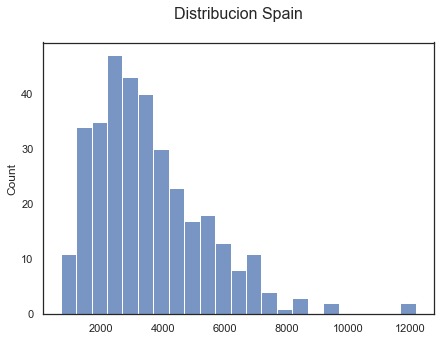

In [18]:
distribution_plotter(data_float[spain_mask][:,1], 'Spain')

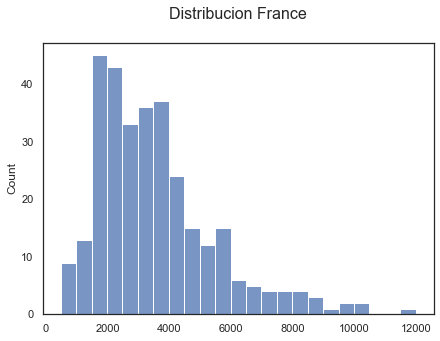

In [17]:
distribution_plotter(data_float[france_mask][:,1], 'France')


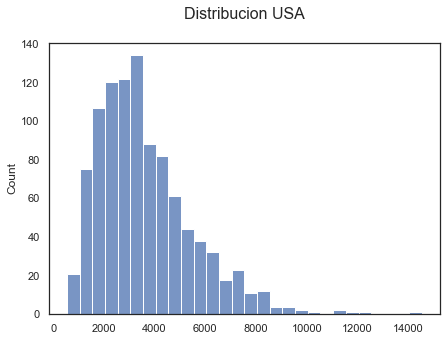

In [19]:
distribution_plotter(data_float[usa_mask][:,1], 'USA')


## Ejercicio 3
Para los tres países del punto anterior, calcular con dos decimales
* Media
* Mediana
* Rango
* Desvío estandard

Repetir para todos los datos de ventas sin distinguir por país.

¿Qué conclusiones pueden sacar respecto a la información que brinda cada una de estas medidas en este caso particular?

In [ ]:
media_sp= np.mean(data_float[spain_mask])
media_fr= np.mean(data_float[france_mask])
media_us= np.mean(data_float[usa_mask])

median_sp= np.median(data_float[spain_mask])
median_fr= np.median(data_float[france_mask])
median_us= np.median(data_float[usa_mask])

rango_sp= np.max(data_float[spain_mask]) - np.min(data_float[spain_mask])
rango_fr= np.max(data_float[france_mask]) - np.min(data_float[france_mask])
rango_us= np.max(data_float[usa_mask]) - np.min(data_float[usa_mask])



In [16]:
all_countries= data_float[:,1] ==  data_float[:,1]
countries = [spain_mask,france_mask,usa_mask,all_countries]

for country in countries:
    media= np.mean(data_float[country][:,1])
    mediana= np.median(data_float[country][:,1])
    rango= np.max(data_float[spain_mask][:,1]) - np.min(data_float[spain_mask][:,1])
    std= np.std(data_float[country][:,1])
    print(np.unique(data_str[country][:,-1]))
    print(f"avg is {media}\n")
    print(f"median is {mediana}\n")
    print(f"range is {rango}\n")
    print(f"std is {std}\n")
    print('--------------------')

['Spain']
avg is 3554.640116959064

median is 3213.8050000000003

range is 11317.2

std is 1833.1375953017705

--------------------
['France']
avg is 3537.9507006369427

median is 3154.3050000000003

range is 11317.2

std is 1939.214360481481

--------------------
['USA']
avg is 3613.5287151394423

median is 3236.06

range is 11317.2

std is 1879.9971929724536

--------------------
['Australia' 'Austria' 'Belgium' 'Canada' 'Denmark' 'Finland' 'France'
 'Germany' 'Ireland' 'Italy' 'Japan' 'Norway' 'Philippines' 'Singapore'
 'Spain' 'Sweden' 'Switzerland' 'UK' 'USA']
avg is 3553.889071909316

median is 3184.8

range is 11317.2

std is 1841.5388520655404

--------------------
